In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib inline
from nltk.corpus import stopwords
import nltk

In [27]:
df = pd.read_csv("data 1_train.csv")

In [28]:
df.head()

,example_id,text,aspect_term,term_location,class
0,2333_1,Obviously one of the most important features o...,human interface,69--84,0
1,1805_1,Good for every day computing and web browsing.,every day computing,9--28,1
2,2782_2,while the keyboard itself is alright[comma] th...,mouse command buttons,115--136,-1
3,1385_0,Again[comma] the same problem[comma] the right...,right speaker,29--42,-1
4,1423_0,My problem was with DELL Customer Service.,DELL Customer Service,20--41,-1


In [29]:
aspect_terms = df[' aspect_term']

In [30]:
#fetching and pre-processing aspect_terms
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
aspect_terms = [aspect_term.replace("[comma]","") for aspect_term in aspect_terms]
aspect_terms = [aspect_term.lower() for aspect_term in aspect_terms]
aspect_terms = [" ".join(aspect_term) for aspect_term in aspect_terms]

In [31]:
messages = df[' text']

In [32]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
messages = [message.replace("[comma]","") for message in messages]
messages = [message.lower() for message in messages]
messages = [tokenizer.tokenize(message) for message in messages]


In [33]:
messages

[['obviously',
  'one',
  'of',
  'the',
  'most',
  'important',
  'features',
  'of',
  'any',
  'computer',
  'is',
  'the',
  'human',
  'interface'],
 ['good', 'for', 'every', 'day', 'computing', 'and', 'web', 'browsing'],
 ['while',
  'the',
  'keyboard',
  'itself',
  'is',
  'alright',
  'the',
  'plate',
  'around',
  'it',
  'is',
  'cheap',
  'plastic',
  'and',
  'makes',
  'a',
  'hollow',
  'sound',
  'when',
  'using',
  'the',
  'mouse',
  'command',
  'buttons'],
 ['again',
  'the',
  'same',
  'problem',
  'the',
  'right',
  'speaker',
  'did',
  'not',
  'work'],
 ['my', 'problem', 'was', 'with', 'dell', 'customer', 'service'],
 ['is',
  'this',
  'partially',
  'due',
  'to',
  'the',
  'fact',
  'that',
  'it',
  'is',
  'running',
  'windows',
  'vista'],
 ['accordingly',
  'i',
  'have',
  'decided',
  'to',
  'never',
  'purchase',
  'another',
  'hp',
  'product',
  'my',
  'five',
  'year',
  'old',
  'compaq',
  'lasted',
  '5',
  'years',
  'before',
  'the

In [34]:
labels = df[' class']

In [35]:
len(labels)

2203

([<matplotlib.axis.XTick at 0x211970facf8>,
 <a list of 3 Text xticklabel objects>)

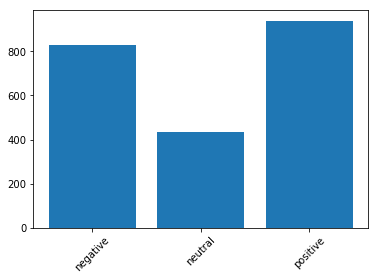

In [36]:
ul = [1,-1,0]
plt.bar(ul,labels.value_counts())
plt.xticks(ul,['positive','negative','neutral'],rotation=45)

In [37]:
messages = [" ".join(message) for message in messages]

In [ ]:
messages

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
v = CountVectorizer(analyzer = 'word',ngram_range=(1,1))

X = v.fit_transform(messages)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score, f1_score
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
lr = LogisticRegression(C=0.000000001,solver='liblinear')
nb = MultinomialNB(fit_prior=False, alpha=0.3)
svc = SVC(kernel = 'linear', max_iter = 1000)
knn = KNeighborsClassifier(n_neighbors=5)
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
clfs=[lr,nb,knn,dt,rf,svc]
names= ["Logistic Regression","Naive Bayes","Nearest Neighbours","Decision Tree","Random Forest","SVM"]
i=0
for clf in clfs:
    pred = cross_val_predict(clf,X_train,list(y_train),cv=10)
    print("THe Training report for "+str(names[i]))
    print(classification_report(list(y_train),pred))
    print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_train),pred)))
    i+=1
    clf.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


THe Training report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.55      0.71      0.62       595
          0       0.00      0.00      0.00       302
          1       0.59      0.72      0.65       645

avg / total       0.46      0.57      0.51      1542

The accuracy for Logistic Regression is :0.5739299610894941
THe Training report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.73      0.69      0.71       595
          0       0.45      0.52      0.48       302
          1       0.77      0.75      0.76       645

avg / total       0.69      0.68      0.69      1542

The accuracy for Naive Bayes is :0.6841763942931258


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


THe Training report for Nearest Neighbours
             precision    recall  f1-score   support

         -1       0.62      0.42      0.50       595
          0       0.61      0.19      0.29       302
          1       0.54      0.88      0.67       645

avg / total       0.59      0.57      0.53      1542

The accuracy for Nearest Neighbours is :0.5667963683527886
THe Training report for Decision Tree
             precision    recall  f1-score   support

         -1       0.66      0.70      0.68       595
          0       0.48      0.45      0.47       302
          1       0.73      0.71      0.72       645

avg / total       0.65      0.65      0.65      1542

The accuracy for Decision Tree is :0.6543450064850843
THe Training report for Random Forest
             precision    recall  f1-score   support

         -1       0.66      0.78      0.72       595
          0       0.62      0.40      0.48       302
          1       0.74      0.74      0.74       645

avg / total       

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sk

THe Training report for SVM
             precision    recall  f1-score   support

         -1       0.71      0.72      0.71       595
          0       0.48      0.45      0.46       302
          1       0.74      0.76      0.75       645

avg / total       0.68      0.68      0.68      1542

The accuracy for SVM is :0.6796368352788587


In [107]:
i=0
for clf in clfs:
    pred = clf.predict(X_test)
    print("THe testing report for "+str(names[i]))
    print(classification_report(list(y_test),pred))
    print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_test),pred)))
    i+=1

THe testing report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.50      0.00      0.01       255
          0       0.00      0.00      0.00       130
          1       0.42      1.00      0.59       276

avg / total       0.37      0.42      0.25       661

The accuracy for Logistic Regression is :0.41906202723146746
THe testing report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.73      0.73      0.73       255
          0       0.50      0.52      0.51       130
          1       0.81      0.79      0.80       276

avg / total       0.72      0.71      0.72       661

The accuracy for Naive Bayes is :0.7140695915279879
THe testing report for Nearest Neighbours
             precision    recall  f1-score   support

         -1       0.77      0.43      0.55       255
          0       0.72      0.24      0.36       130
          1       0.55      0.95      0.70       276

avg / total      

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<2203x3251 sparse matrix of type '<class 'numpy.int64'>'
	with 36986 stored elements in Compressed Sparse Row format>